In [ ]:
!pip freeze | grep wordcloud 

wordcloud==1.8.2.2


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from collections import Counter

In [ ]:
print(STOPWORDS)
MYSTOPWORDS = STOPWORDS.update(['39s', 'quot'])

{'itself', 'because', 'were', 'under', "hadn't", 'same', "let's", 'after', "there's", 'yourselves', 'can', 'how', "hasn't", 'yours', "when's", 'a', 'her', "mustn't", "weren't", "he's", 'in', "haven't", '3', 'is', 'be', 'as', 'through', 'herself', "wasn't", 'the', 'or', 'himself', "wouldn't", 'again', 'he', "isn't", 'most', 'an', "they've", 'too', "what's", 'from', 'him', 'his', 'and', 'of', 'ought', "they'd", "we've", 'you', "i'll", "she'll", 'their', 'theirs', 'whom', "didn't", 'http', 'than', "he'll", 'me', 'into', 'only', 'k', 'ourselves', "shouldn't", 'to', 'out', "she's", 'myself', "how's", 'until', 'should', 'it', 'these', 'where', 'yourself', 'does', 'what', "they're", "shan't", 'ours', 'did', 'on', '9', 'would', 'few', 'get', 'was', 'them', 'why', 'ever', 'she', 'if', 'such', "you've", 'about', "it's", 'www', 'since', 'once', 'otherwise', 'i', 'do', 'cannot', 'they', 'nor', 'all', "i'd", 's', 'but', 'themselves', "doesn't", "he'd", 'else', 'we', 'just', 'this', 'been', 'off', '

In [ ]:
df = pd.read_csv("ufo_sightings_scrubbed.csv")
#print(df)

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (5,9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
print(df.comments)

<class 'pandas.core.series.Series'>


In [ ]:
all_comments = " ".join(str(s) for s in df.comments)
#print(all_comments[0:100])
#all_comments = " ".join(str(s).split()[1] for s in df.comments)

In [ ]:
def word_count(str):
    counts = dict()
    words = str.split()

    for word in words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1

    return counts

In [ ]:
wc = word_count(all_comments)
print(wc)
print(dict(sorted(wc.items(), key=lambda item: item[1], reverse=True)))

In [ ]:
word_counts = Counter(all_comments.split(" "))
stopwords2 = ['A', 'on', 'the', 'of', 'and', 'is','to','in','a','from','by','that', 'with', 'this', 'as', 'an', 'are','its', 'at', 'for', ':', 'I', 'it', 'over', 'was', 'then', ' ', '']
words_without_stopwords = [ word for word in all_comments.split(" ") if word not in stopwords2 ]
most_communs = Counter(words_without_stopwords).most_common(20)
for w in most_communs:
    print(f"{w[0]}: {w[1]} ")

light: 14131 
lights: 13545 
object: 11663 
sky: 10534 
bright: 8174 
moving: 8128 
white: 5665 
saw: 5554 
my: 5485 
shaped: 5337 
seen: 5083 
orange: 4909 
very: 4770 
red: 4671 
like: 4289 
flying: 4229 
craft: 3973 
Bright: 3927 
sky.: 3608 
3: 3524 


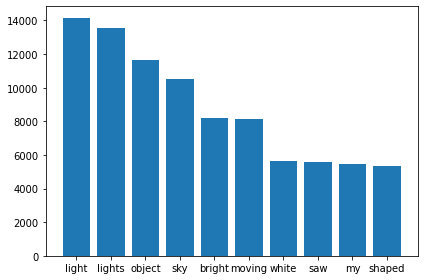

In [ ]:
most_communs = Counter(words_without_stopwords).most_common(10)
D = dict(most_communs)
plt.bar(range(len(D)), list(D.values()), align='center')
plt.xticks(range(len(D)), list(D.keys()))
plt.tight_layout()
plt.show()

In [ ]:
MYSTOPWORDS = STOPWORDS.update(stopwords2)

In [ ]:
print(all_comments[0:100])

This event took place in early fall around 1949-50. It occurred after a Boy Scout meeting in the Bap


In [ ]:
stopwords = set(all_comments)

print(stopwords)

{'Z', 'x', 'C', 'G', 'c', '~', 'g', 'J', '7', 'a', '}', '3', '+', 'H', 'D', 'j', '0', '>', 'L', 'O', ' ', 'W', '_', '{', '1', 'E', 'T', '=', ']', '<', '6', 'k', '\\', 'o', 'w', '`', '(', '^', 'X', 'Y', '9', 'q', 'N', '?', '|', 'Q', 'V', 'M', '%', '&', 'F', ':', 'i', 'm', 's', ';', 'e', 'U', '5', '-', '/', '#', 'l', 'f', 'A', '2', '8', 'R', '4', 'u', 'n', 'v', '[', 'b', '@', 'I', 't', 'P', 'd', ')', '*', 'K', 'z', 'p', 'h', 'y', '.', '$', 'r', 'S', 'B'}


In [ ]:
#stopwords.update(["in", "wa", 'the', 'of', 'it', 'was', 'as', 'we', 'but', 'to be', 'or', 'from', 'and'])

wordcloud = WordCloud(stopwords=MYSTOPWORDS,
                      background_color = 'white',
                      width=1600, height=800, 
                      collocations = False, max_words=200, min_word_length=3).generate(all_comments)

#wordcloud = WordCloud(background_color = 'white',
#                      width=1600, height=800, 
#                      collocations = False, max_words=200).generate(all_comments)

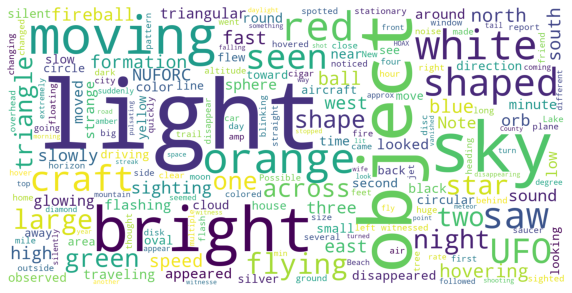

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))

ax.imshow(wordcloud, interpolation='bilinear')

ax.set_axis_off()
plt.imshow(wordcloud)

In [ ]:
wordcloud.to_file("ufo_wordcloudv3.png")

In [ ]:
print(wordcloud.words_)

{'light': 1.0, 'object': 0.5253659347970725, 'sky': 0.475659791528055, 'bright': 0.3698436460412508, 'moving': 0.2556830782878687, 'orange': 0.24753271235307164, 'white': 0.2256043468618319, 'red': 0.2196163229097361, 'shaped': 0.1956919494344644, 'saw': 0.18643269017520514, 'craft': 0.16503104901308494, 'UFO': 0.15998558438678198, 'seen': 0.1591261920603238, 'flying': 0.13902750055444665, 'two': 0.12486138833444223, 'star': 0.12394655134176093, 'large': 0.12167332002661344, 'night': 0.114354624085163, 'one': 0.10357063650476823, 'green': 0.1029884675094256, 'across': 0.09941228653803504, 'triangle': 0.09785983588378798, 'shape': 0.09658460856065647, 'hovering': 0.0961964958970947, 'fast': 0.09478265690840541, 'blue': 0.09422821024617432, 'north': 0.0941173209137281, 'ball': 0.09081836327345309, 'formation': 0.08760257263251275, 'speed': 0.08754712796628965, 'south': 0.08660456864049679, 'east': 0.08638278997560435, 'west': 0.0858560656464848, 'fireball': 0.08355511199822577, 'high': 0

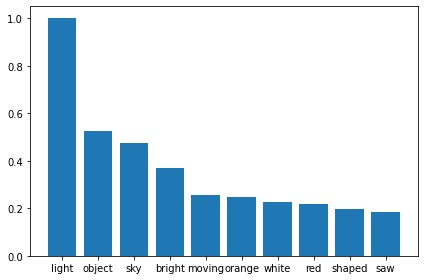

In [ ]:
#most_communs = Counter(words_without_stopwords).most_common(10)
most_communs2 = wordcloud.words_
most_communs3 = dict(sorted(most_communs2.items(), key=lambda item: item[1], reverse=True))
#print(most_communs3)
#D = dict(most_communs)
first10pairs = {k: most_communs3[k] for k in list(most_communs3)[:10]}
D = first10pairs
plt.bar(range(len(D)), list(D.values()), align='center')
plt.xticks(range(len(D)), list(D.keys()))
plt.tight_layout()
plt.show()
